In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import splitfolders
import scipy.io
import pandas as pd
import shutil
import glob

# testing materials

In [2]:
parent_dir ="full_seg_images"
data_dir = pathlib.Path(parent_dir)

In [3]:
data_dir

WindowsPath('full_seg_images')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8189


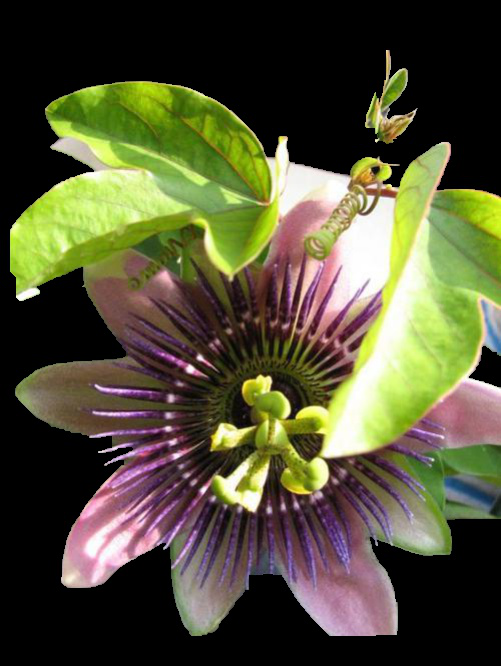

In [5]:
roses = list(data_dir.glob('segment/*'))
PIL.Image.open(str(roses[2]))

# open matlab get labels

In [6]:
matfile = scipy.io.loadmat('imagelabels.mat')

In [7]:
x = matfile['labels'].T

In [8]:
x

array([[77],
       [77],
       [77],
       ...,
       [62],
       [62],
       [62]], dtype=uint8)

# create folder

folder = np.unique(x)
folder_string = folder.astype(str)


create_dir ="seg_images"
for ide in folder_string:
    path = os.path.join(create_dir, ide)
    os.mkdir(path)
    

# copy images


In [11]:
#create list
obj = {}
for i in range(1, 103):
    obj['class'+str(i)] = []

#obj['class77'].append(2)
#i = 77
#obj['class'+str(i)].append(1)
#print(obj['class'+str(i)])

In [12]:
count = 1

for i in x:
    obj['class'+str(i[0])].append(count)
    count+=1



In [13]:
for key in obj:
    obj[key] = [str(item).zfill(5) for item in obj[key]]

In [14]:
print(obj['class102'])

['08000', '08001', '08002', '08003', '08004', '08005', '08006', '08007', '08008', '08009', '08010', '08011', '08012', '08013', '08014', '08015', '08016', '08017', '08018', '08019', '08020', '08021', '08022', '08023', '08024', '08025', '08026', '08027', '08028', '08029', '08030', '08031', '08032', '08033', '08034', '08035', '08036', '08037', '08038', '08039', '08040', '08041', '08042', '08043', '08044', '08045', '08046', '08047']


In [18]:
for i in range(1, 103):
    dst_dir = f"seg_images\\{i}"
    src_dir = "full_seg_images\\segment"
    for imageName in obj['class'+str(i)]:
        shutil.copy(os.path.join(src_dir, f"image_{imageName}.jpg"), dst_dir)

# slipt folder

In [20]:
splitfolders.ratio("seg_images", output="seg_train", seed=1337, ratio=(.64, .16 , .2), group_prefix=None)